In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<font style = 'font-family:Book Antiqua'><font size = 7>
    <b>Challenge: Preparing a Dataset for Modeling</b>
    
<font style = 'font-family:Book Antiqua'><font size = 3>
<i>Unit 2.1 Project 8</i>

<font style = 'font-family:Book Antiqua'><font size = 4><b>Assignment:</b> Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.


<b>Data Set Selected:</b> <a href = 'https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results'>120 Years of Olympic History: Athletes and Results</a> from Kaggle.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Setting plot size.
sns.set(rc={'figure.figsize':(11.7,8.27)})

<font style = 'font-family:Book Antiqua'><font size = 5.5><b>Exploring the Data</b>

In [5]:
# Downliading the data set.
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<font style = 'font-family:Book Antiqua'><font size = 4>Below the columns are categorized into categorical, continous and outcome variables:


<b>Categorical</b>
- Name
- Sex
- Team
- NOC
- Games
- Season
- City
- Sport
- Event


<b>Continuous</b>
- ID
- Age
- Height
- Weight
- Year


<b>Outcome</b>
- Medal

<font style = 'font-family:Book Antiqua'><font size = 4>I am dropping some columns that are duplicates within the data frame. The column <i>NOC</i> is essentilay the same as <i>Team</i>. Column <i>Games</i> combines the column <i>Year</i> and <i>Season</i>. Similarly, <i>Event</i> combines two columns: <i>Sport</i> and <i>Sex</i>. The <i>ID</i> column is not a duplicate but is not needed to analyze the data set. I am also dropping rows that are missing information.

In [83]:
# Creating new data frame that excludes dropped columns.
df2 = df.drop(columns=['ID','Team','Games','Event','City'])
df2.head(2)

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,Judo,NaN


In [84]:
# Creating new data frame that excludes all blank and null values.
df3 = df2.dropna()
df3.head(2)

,Name,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014,Winter,Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948,Summer,Gymnastics,Bronze


<font style = 'font-family:Book Antiqua'><font size = 4>Below is a scatterplot exploring the relationships between continuous variables. Height, weight, and age appear to have a strong correlatiom while year, weight, height, and age do not.

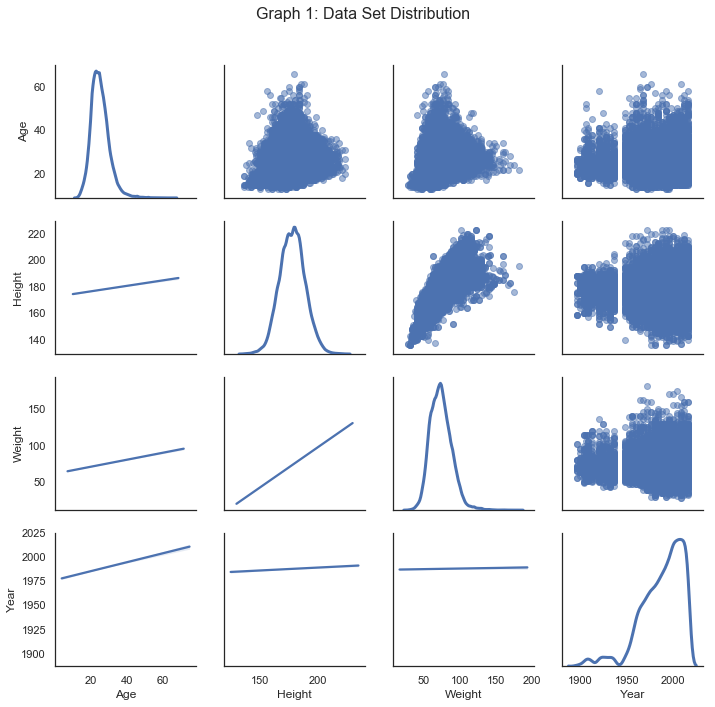

In [85]:
# Setting default plot aesthetics.
sns.set_style("white")

# Making a scatterplot matrix and dropping null values.
g = sns.PairGrid(df3, diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Graph 1: Data Set Distribution', fontsize=16)
plt.show()

<font style = 'font-family:Book Antiqua'><font size = 4>The heatmap below also dispays the relationship between the continous variables. Here, it is easier to see the corralation between variables and whether it is a positive relationship or negative relationship.

             Age    Height    Weight      Year
Age     1.000000  0.095942  0.161750  0.103740
Height  0.095942  1.000000  0.801831  0.029073
Weight  0.161750  0.801831  1.000000  0.008149
Year    0.103740  0.029073  0.008149  1.000000


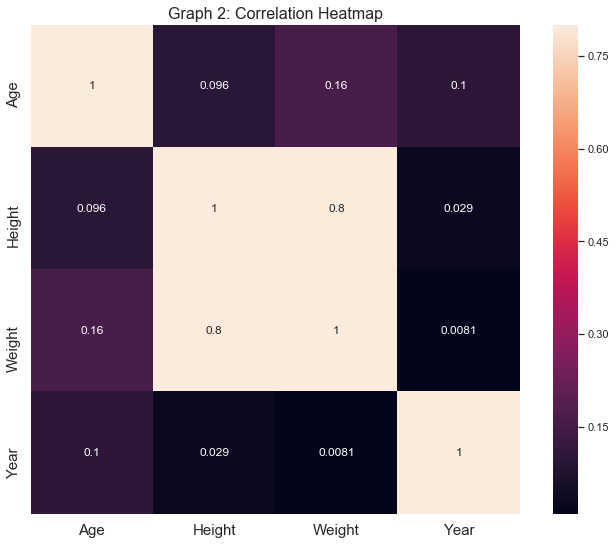

In [86]:
# Setting plot size.
sns.set(rc={'figure.figsize':(16,16)})

# Make the correlation matrix.
corrmat = df3.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, annot = True)
ax.set_title('Graph 2: Correlation Heatmap', fontsize = 16)
ax.tick_params(labelsize=15)
plt.show()

<font style = 'font-family:Book Antiqua'><font size = 4>In the boxplot below, we are looking at the distribution of medals by age and gender for the whole data set. There appear to be a lot of outliers within the data set among older males and females for all medal categories. This would explain why the the hsitogram in <b>Graph 1</b> had a right tail for age.

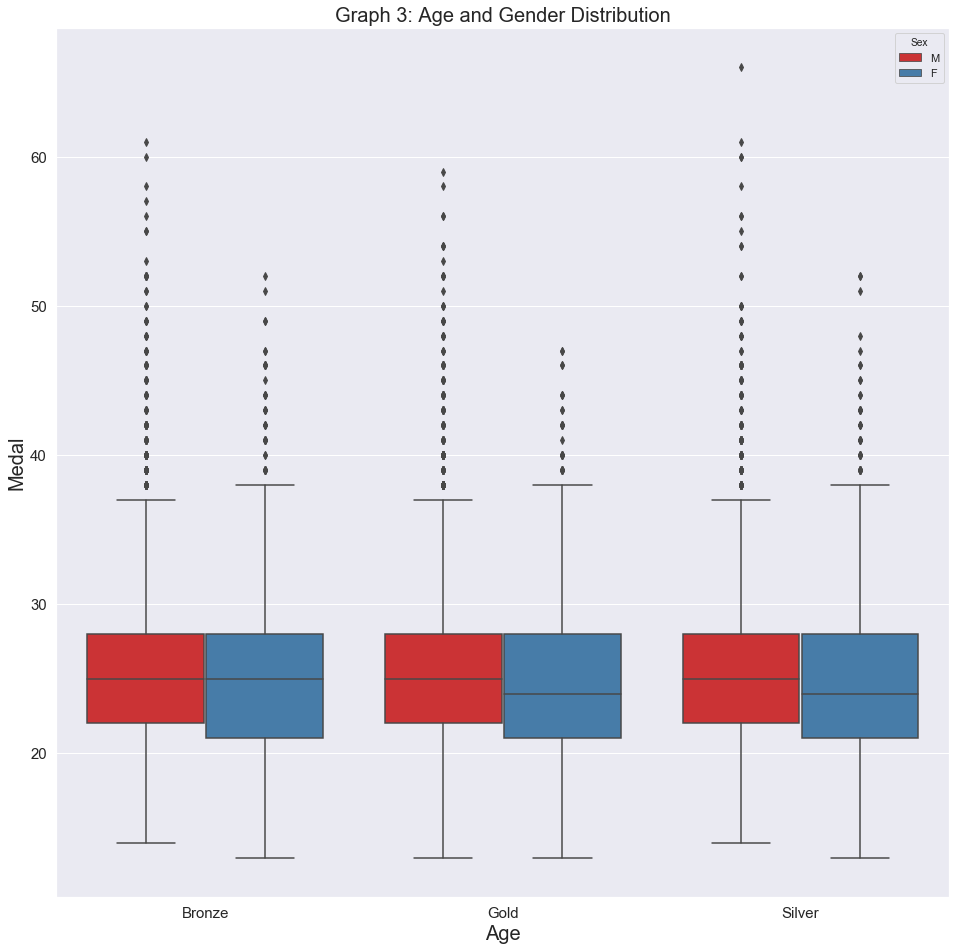

In [87]:
# Setting plot size.
sns.set(rc={'figure.figsize':(16,16)})

# Creating boxplot to see the distribution of medals by age and gender.
ax = sns.boxplot(x = 'Medal',
                 y = 'Age',
                 data = df3, 
                 hue = 'Sex',
                 palette='Set1')
ax.set_xlabel('Age',fontsize=20)
ax.set_ylabel('Medal',fontsize=20)
ax.tick_params(labelsize=15)
ax.set_title('Graph 3: Age and Gender Distribution', fontsize=20)
plt.show()

<font style = 'font-family:Book Antiqua'><font size = 4><b>Graph 4</b> displays the the number of athletes who won gold medals for China and Denmark, split by gender. From the graph, more males won gold medals by a wide margin in gymnastics, rowing, and sailing. However, more females won gold for handball, diving, and volleyball.

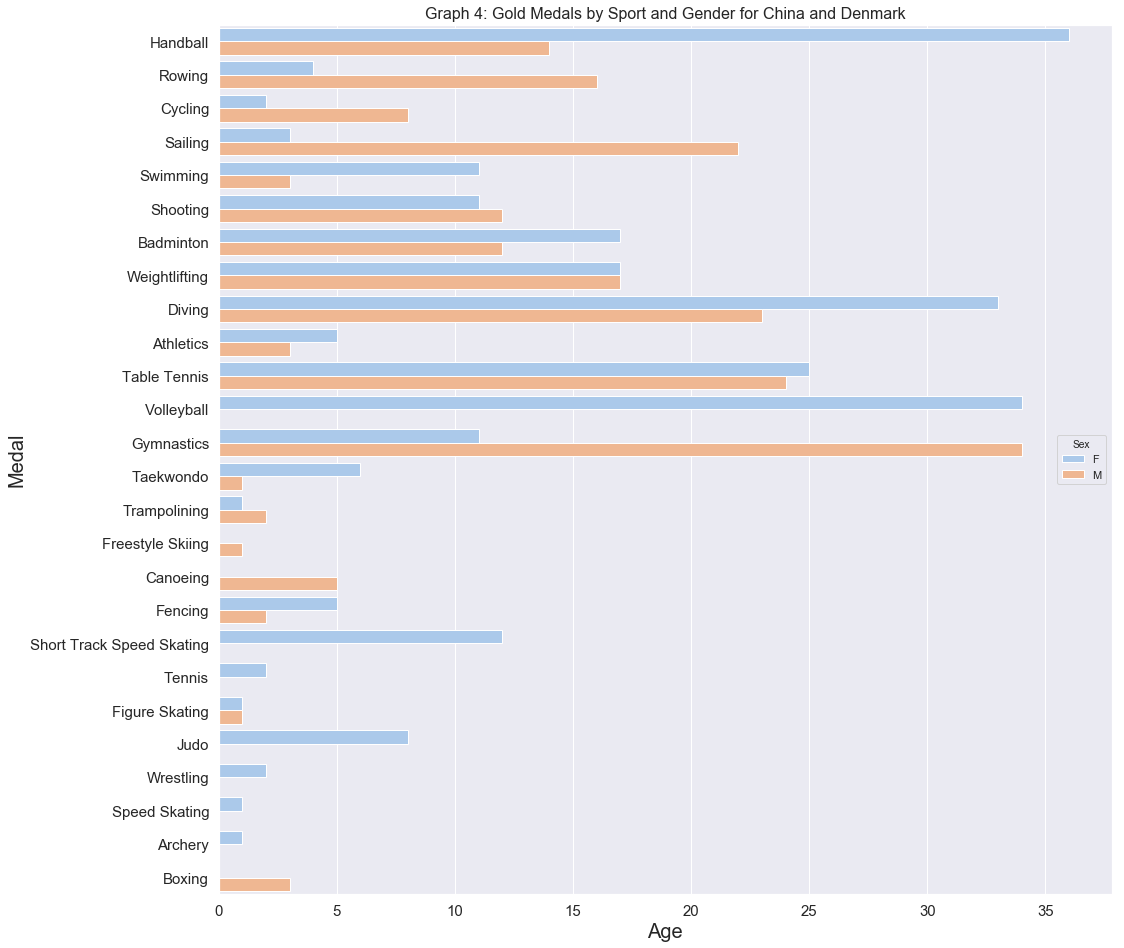

In [88]:
# Setting plot size.
sns.set(rc={'figure.figsize':(16,16)})

# Add a second categorical variable.
df_2cat = df3.loc[
    ((df3['NOC'] == 'CHN') | (df3['NOC'] == 'DEN')) & (df3['Medal'] == 'Gold'),
    ['Sport','Sex']
]

# Create a text variable so that output is easier to interpret.
df_2cat['Sex_cat'] = None
df_2cat.loc[df_2cat['Sex'] == 'M', 'Gender_cat'] = 'Male'
df_2cat.loc[df_2cat['Sex'] == 'F', 'Gender_cat'] = 'Female'

# Plot counts for each combination of levels.
sns.countplot(y='Sport', hue='Sex', data=df_2cat, palette='pastel')
plt.xlabel('Age',fontsize=20)
plt.ylabel('Medal',fontsize=20)
plt.tick_params(labelsize=15)
plt.title('Graph 4: Gold Medals by Sport and Gender for China and Denmark', fontsize=16)
plt.show()

<font style = 'font-family:Book Antiqua'><font size = 4>Now that I have gotten to know the data set, it is time to create some new features.

<font style = 'font-family:Book Antiqua'><font size = 5.5><b>Changing Variable Types - Creating New Features</b>

In [9]:
print(df.NOC.unique())

['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB' 'I

In [99]:
# Setting features for data set.
features = df3[['Name',
                'Sex',
                'Age',
                'Height',
                'Weight',
                'NOC',
                'Year',
                'Season',
                'Sport',
                'Medal']]

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 1: Gender</b>

I am creating new feature called <i>Gender</i>. This feature will be a boolean value of the column <i>Sex</i>, where if an olympian is a male or 'M', then the new value will be '1'.

In [116]:
# 1. Creating a boolean variable for Sex.
features['Female'] = np.where((df3['Sex'].isin(['F'])), 1, 0)

# Checking to make sure it worked.
print(df3['NOC'].groupby(features['Female']).describe())

        count unique  top  freq
Female                         
0       19831    136  USA  2732
1       10350     99  USA  1651


<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 2: Converting Height from Centimeters to Meters</b>
    
Converting the height from Centimeters to Meters for easier analysis.

In [89]:
# 2. Converting height column from Centimeters to Meters
features['Height_M'] = df3['Height']*.01

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 3: BMI</b>

Using the weight and height given, I have calculated each olympians BMI using the formula:

weight (kg) / height(M) ^ 2

In [110]:
# 3. BMI combines the 'height' and 'weight' feature into the BMI relationship.
features['BMI'] = df3['Weight'] / (df3['Height'] ** 2)

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 4: Olympians under 25yrs</b>
    
Creating a boolean value for olympians under 25 years old. 

In [76]:
# 4. Age under 25
features['Under 25'] = np.where(df3['Age']>=25, 1, 0)

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 5: Middle Aged Olympians</b>
    
Creating a boolean value for olympians between 25 years old and 50. 

In [95]:
# 5. Age between 25 and 50
features['Middle Age'] = np.where((df3['Age']>25) & (df3['Age'] <=50), 1, 0)

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 6: Senior Olympians</b>
    
Creating a boolean value for olympians who are older than 50 years.

In [96]:
# 6. Age above 50
features['Seniors'] = np.where((df3['Age']>50), 1, 0)

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 7: Gold Medal Winners</b>
    
Creating a boolean value for olympians who received a Gold medal. 

In [102]:
# 7. Got a Medal
features['Placed'] = np.where((df3['Medal'].isin(['Gold'])), 1, 0)

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 8: Summer Olympics</b>
    
Creating a boolean value to select summer.

<font style = 'font-family:Book Antiqua'><font size = 4><b>Feature 9: Swimming</b>
    
Creating a boolean value to select the sport swimming.

In [118]:
# 9. Swimming
features['Swimming'] = np.where((df3['Sport'].isin(['Swimming'])), 1, 0)

<font style = 'font-family:Book Antiqua'><font size = 4><b>Features 10-17: Regions</b>
    
Creating boolean values to replace NOC and splitting them into 8 regions: East Asia, South America, West Europe, Eastern Europe, Africa, North America, and 
Nordic.

In [101]:
# 9. East Asia countries dummy.
features['East Asia'] = np.where((df3['NOC'].isin(['CHN', 'KOR', 'JPN', 'PHI', 'HKG', 'MGL', 'PRK', 'TPE', 'MAS'])), 1, 0)

# 10. South America countries dummy 
features['South America'] = np.where((df3['NOC'].isin(['ARG', 'ECU', 'SUR', 'BOL', 'BRA', 'GUY', 'URU', 'CHI', 'COL',
                                                 'PAR', 'PER', 'VEN'])), 1,0)

# 11. Western European countries dummy
features['West Europe'] = np.where((df3['NOC'].isin(['FRA', 'ENG', 'ESP', 'POR', 'ITA', 'MON', 'SUI', 'GER',
                                                   'BUL', 'GRE'])), 1, 0)

# 12. Eastern European countries dummy
features['Eastern Europe'] = np.where((df3['NOC'].isin(['ROU', 'EST', 'AZE', 'RUS', 'BLR'])), 1, 0)

# 13. African countries
features['Africa'] = np.where((df3['NOC'].isin(['CMR', 'GHA'])), 1, 0)

# 14. North African countries
features['North Africa'] = np.where((df3['NOC'].isin(['MAR', 'EGY', 'IRI', 'CHA', 'SUD', 'UAR', 'LIB', 'QAT'])), 1, 0)

# 15. North American countries
features['North America'] = np.where((df3['NOC'].isin(['USA', 'CAD', 'MEX'])), 1, 0)

# 16. Nordic Countries
features['Nordic'] = np.where((df3['NOC'].isin(['DEN', 'NED', 'FIN', 'NOR'])), 1, 0)

<font style = 'font-family:Book Antiqua'><font size = 5.5><b>Feature Engineering ans Selecting "Best" 5 Features

<font style = 'font-family:Book Antiqua'><font size = 4>The 5 best features to keep would features that looks at specific parts of the world, features that separate by gender, features of who won a medal, BMI, and specific sports. This will allow modeling to take place on many different levels and answer different questions.

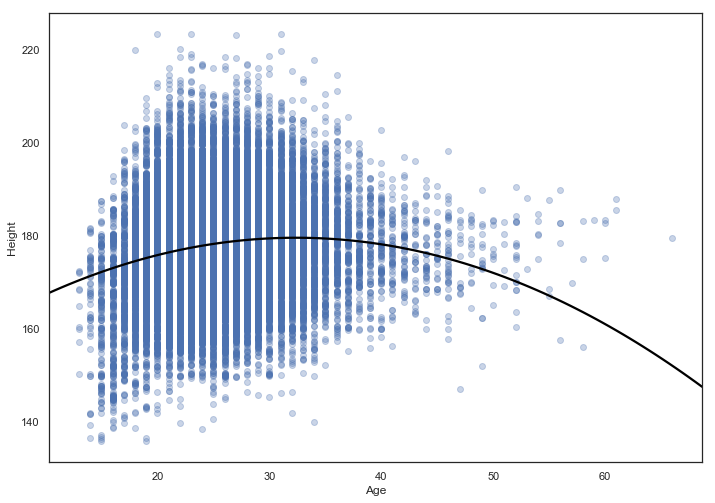

In [127]:
sns.regplot(
    df3['Age'],
    y=df3['Height'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None,
)
plt.show()

features['age_squared'] = df3['Age'] * df3['Age']

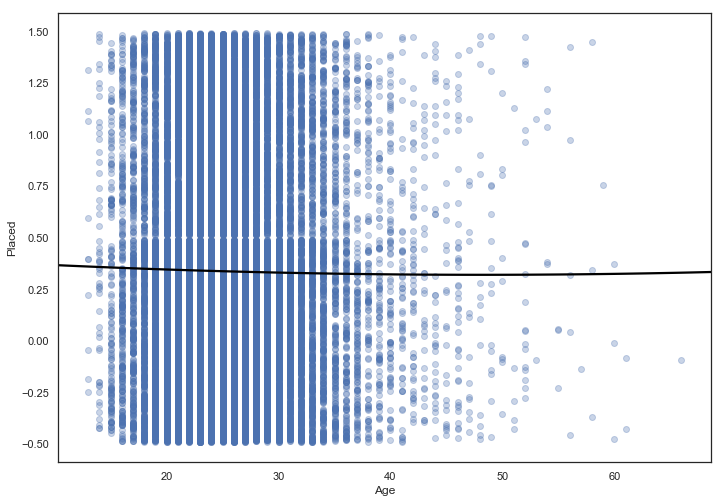

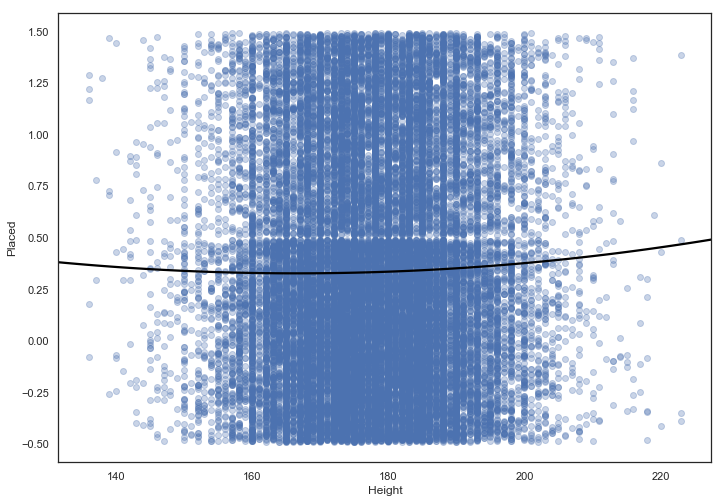

In [107]:
sns.regplot(
    df3['Age'],
    y=features['Placed'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

sns.regplot(
    df3['Height'],
    y=features['Placed'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

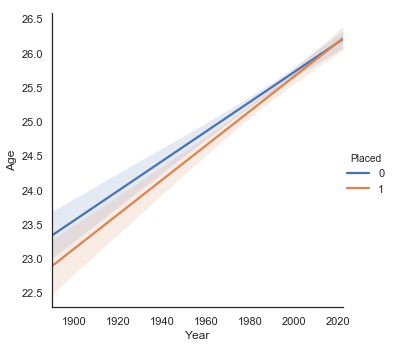

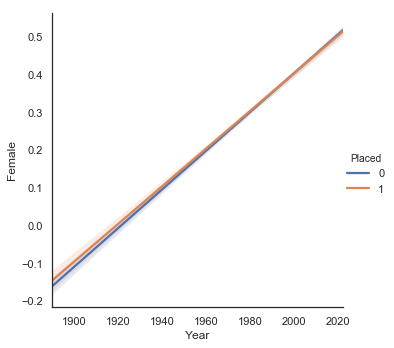

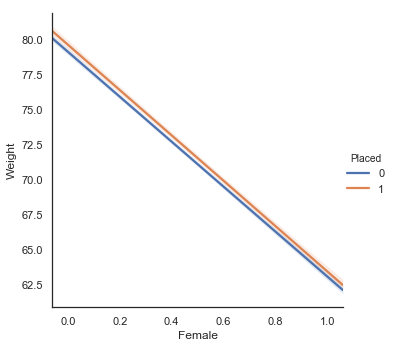

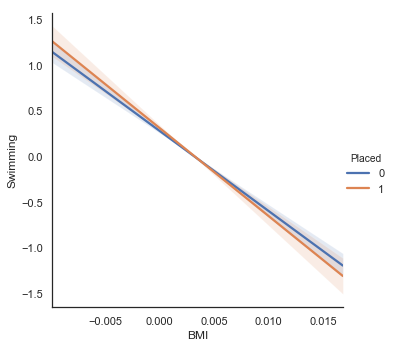

In [119]:
# Create the interaction.
features['Female Height'] = df3['Height'] * features['Female']
features['Age'] = df3['Age']
features['Year'] = df3['Year']
features['Weight'] = df3['Weight']

# A plot of an interaction.
sns.lmplot(
    x='Year',
    y='Age',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()

# A plot of an interaction.
sns.lmplot(
    x='Year',
    y='Female',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()

# A plot of an interaction.
sns.lmplot(
    x='Female',
    y='Weight',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()


# A plot of an interaction.
sns.lmplot(
    x='BMI',
    y='Swimming',
    hue='Placed',
    data=features,
    scatter=False
)
plt.show()

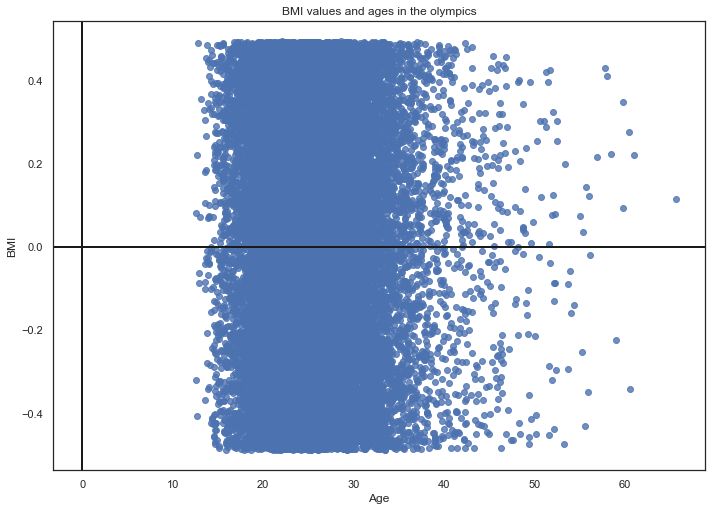

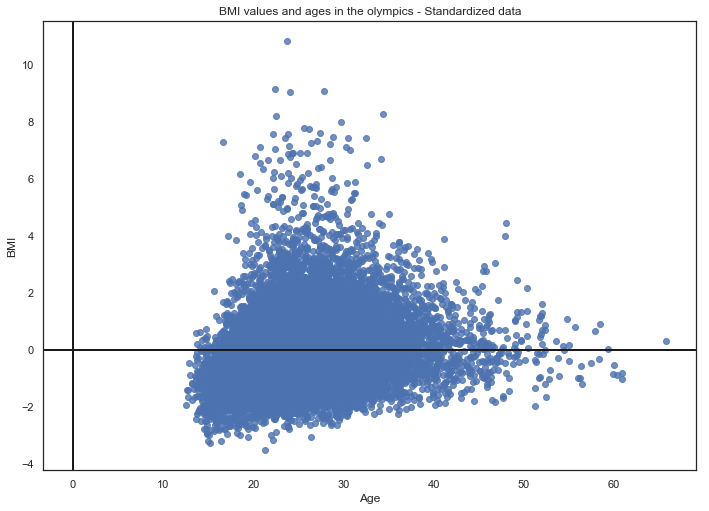

In [124]:
t = sns.regplot(
    df3['Age'],
    features['BMI'],
    df,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
#t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('BMI values and ages in the olympics')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
features['Age'] = (features['Age'] - features['Age'].mean()) / features['Age'].std()
features['BMI'] = (features['BMI'] - features['BMI'].mean()) / features['BMI'].std()

t = sns.regplot(
    df3['Age'],
    features['BMI'],
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('BMI values and ages in the olympics - Standardized data')
plt.show()

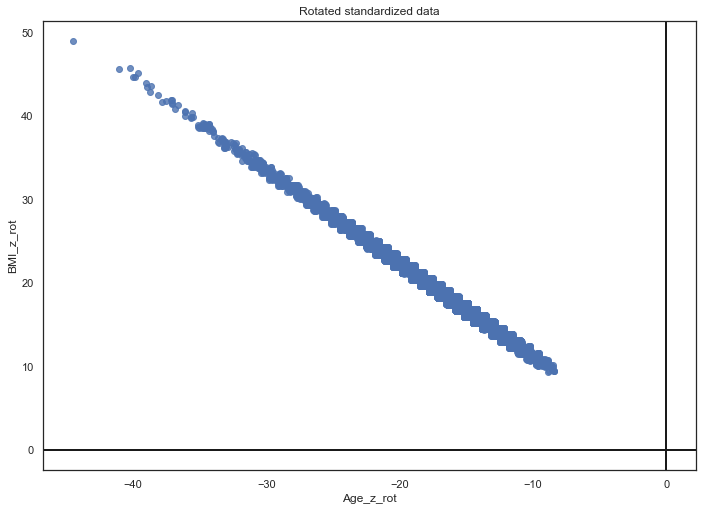

In [114]:
# Rotating the data so that the axes roughly match to vector above.
features['Age_z_rot'] = math.cos(40) * features['Age'] - math.sin(40) * features['BMI']
features['BMI_z_rot'] = math.sin(40) * features['Age'] + math.cos(40) * features['BMI']

t = sns.regplot(
    'Age_z_rot',
    'BMI_z_rot',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()